# ***Analisis de Metricas de Cardenillo en Spotify***

### Documentacion

Acceso de Spotify para desarrolladores

https://developer.spotify.com/

Documentacion de la Apis de Spotify

https://spotipy.readthedocs.io/en/2.22.1/

In [ ]:
!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.7/251.7 kB 5.9 MB/s eta 0:00:00


In [ ]:
import spotipy
import spotipy.oauth2
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy

Client_ID = "2558e4a4d3534c71bb56f5d6556c99e8"
Client_secret = "b1748b15bfce414588e2f6e36c0b64cc"

Client_credentials_manager = SpotifyClientCredentials(client_id=Client_ID, client_secret=Client_secret)
sp = spotipy.Spotify(client_credentials_manager=Client_credentials_manager)


### Artista

In [ ]:
#Realizamos la busqueda del artista a analizar en este caso "Cardellino" limitando la busqueda en 1 y de tipo "artista"
busqueda = sp.search(q='Cardellino', limit=1, offset=0, type='artist')
artista_id = busqueda['artists']['items'][0]['id']
artista_id

'7HFja6X48hWE58m3pQnGV0'

Id del Artista

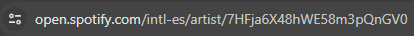

Perfil en el sitio web de Spotify

https://open.spotify.com/intl-es/artist/7HFja6X48hWE58m3pQnGV0

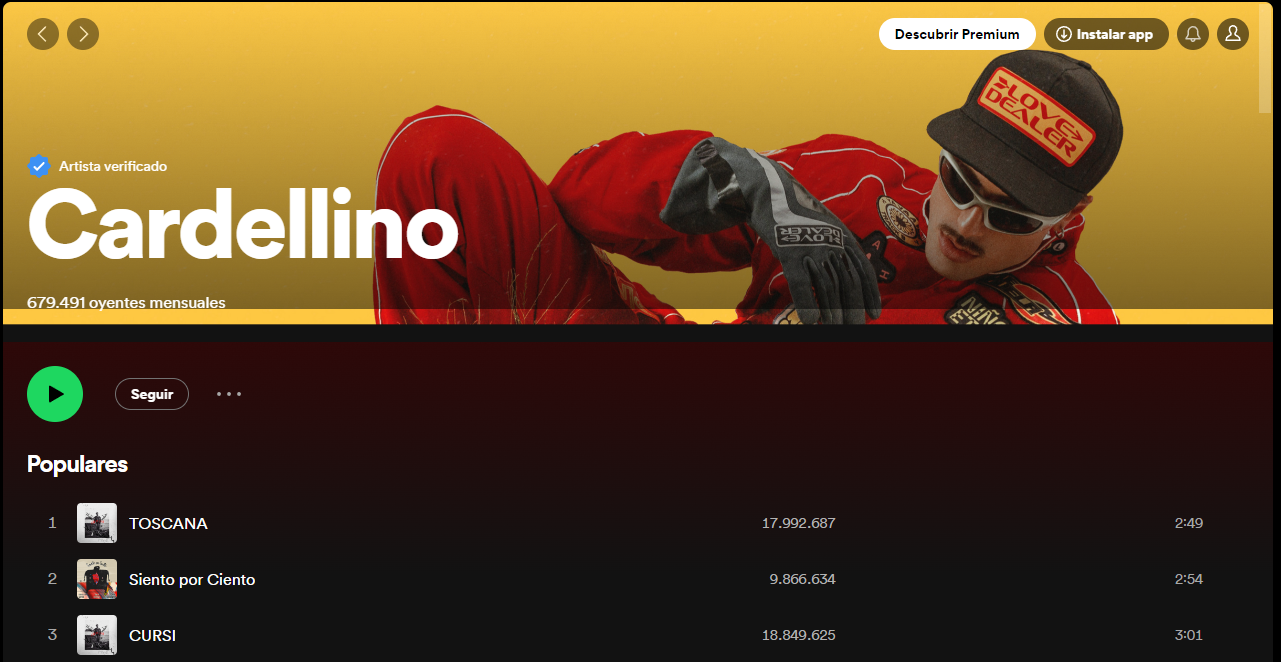

In [ ]:
def encontrarID(artista):
    resultados = sp.search(q=artista, limit=1, type='artist')
    return resultados['artists']['items'][0]['id']

def obtenerData(artista_id): # 'album', 'single', 'appears_on', 'compilation'
    canciones_data = [] # Crear una lista vacía para almacenar los datos de las canciones

    albumes = sp.artist_albums(artista_id, album_type='album') # Álbumes del artista
    singles = sp.artist_albums(artista_id, album_type='single') # Singles del artista

    for album in albumes['items'] + singles['items']: # Canciones para cada álbum
        album_nombre = album['name']
        album_tipo = {'album':'Álbum', 'single':'Single'}[album['album_type']]
        album_año = album['release_date'].split('-')[0]  # Año de lanzamiento

        tracks = sp.album_tracks(album['id']) #La variable tracks va a obtener todas las variables de las canciones

        for track in tracks['items']: # Para cada canción, obtener los detalles y añadirlos a la lista de canciones
            cancion_nombre = track['name'] #Nombre
            cancion_artistas = ', '.join([t['name'] for t in track['artists']]) #Artistas en conjuntos
            cancion_duracion = '{:02d}:{:02d}'.format(*divmod(track['duration_ms'] // 1000, 60)) # Duracion pasada a minutos y segundos (se divide en 1000 y luego en 60)
            cancion_popularidad = sp.track(track['id'])['popularity'] # Popularidad de la canción

            # Se crea la lista de canciones con las variables
            canciones_data.append([album_nombre, album_tipo, album_año, cancion_nombre, cancion_artistas, cancion_duracion, cancion_popularidad])

    return pd.DataFrame(canciones_data, columns=['Álbum', 'Tipo', 'Año', 'Canción', 'Artistas', 'Duración', 'Popularidad'])

In [ ]:
id_Cardenillo = encontrarID('Cardellino')
print('ID de Cardellino:', id_Cardenillo)

df_Car = obtenerData(id_Cardenillo)
df_Car

ID de Cardellino: 7HFja6X48hWE58m3pQnGV0


,Álbum,Tipo,Año,Canción,Artistas,Duración,Popularidad
0,Love Dealer,Álbum,2022,MILLO,Cardellino,01:16,35
1,Love Dealer,Álbum,2022,IMPREDECIBLE,Cardellino,03:04,36
2,Love Dealer,Álbum,2022,AHORA,Cardellino,02:41,44
3,Love Dealer,Álbum,2022,SIX FLAGS,"Cardellino, M2H",02:39,50
4,Love Dealer,Álbum,2022,SIN PLANES,"Cardellino, Pj Sin Suela",02:56,44
...,...,...,...,...,...,...,...
102,Living Session,Single,2021,Coltrane - Living Session,"Cardellino, Emme",02:24,29
103,Living Session,Single,2021,90's - Living Session,"Cardellino, Emanero",02:06,48
104,Living Session,Single,2021,Una Luz - Living Session,Cardellino,01:57,26
105,No Te Olvides,Single,2021,No Te Olvides,Cardellino,05:24,27


In [ ]:
df_Car.Año

0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
102    2021
103    2021
104    2021
105    2021
106    2021
Name: Año, Length: 107, dtype: object

In [ ]:
df_Car.sort_values(by=['Popularidad'], ascending=False).reset_index().head(20) #Canciones mas Populares

,index,Álbum,Tipo,Año,Canción,Artistas,Duración,Popularidad
0,43,Cardellino,Álbum,2020,TOSCANA,Cardellino,02:49,55
1,44,Cardellino,Álbum,2020,CURSI,Cardellino,03:01,55
2,73,Chistes Malos,Single,2024,Chistes Malos,"Xavibo, Cardellino",02:51,55
3,81,Quién Pudiera?,Single,2023,Quién Pudiera?,"Cardellino, Irepelusa, Çantamarta, Veztalone, ...",03:33,54
4,35,TIRAMISÙ,Álbum,2021,90's Ft. Emanero - Acústico,"Emanero, Cardellino",01:52,54
5,53,Cardellino,Álbum,2020,UNA LUZ,Cardellino,02:07,54
6,6,Love Dealer,Álbum,2022,NIÑO ETERNO,Cardellino,02:41,51
7,45,Cardellino,Álbum,2020,COLTRANE,"Cardellino, Carlota Urdiales",02:43,51
8,3,Love Dealer,Álbum,2022,SIX FLAGS,"Cardellino, M2H",02:39,50
9,61,Volando Sin Capa,Álbum,2020,Fin de Semana - Acústico,Cardellino,02:30,50


### Cancion más popular

In [ ]:
df_canciones = df_Car.copy()
df_canciones['Duración_seg'] = df_canciones['Duración'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))
df_canciones.head()

,Álbum,Tipo,Año,Canción,Artistas,Duración,Popularidad,Duración_seg
0,Love Dealer,Álbum,2022,MILLO,Cardellino,01:16,35,76
1,Love Dealer,Álbum,2022,IMPREDECIBLE,Cardellino,03:04,36,184
2,Love Dealer,Álbum,2022,AHORA,Cardellino,02:41,44,161
3,Love Dealer,Álbum,2022,SIX FLAGS,"Cardellino, M2H",02:39,50,159
4,Love Dealer,Álbum,2022,SIN PLANES,"Cardellino, Pj Sin Suela",02:56,44,176


In [ ]:
canciones_populares = df_canciones.sort_values(by=['Popularidad'], ascending = False).reset_index().head(10)
canciones_populares

,index,Álbum,Tipo,Año,Canción,Artistas,Duración,Popularidad,Duración_seg
0,43,Cardellino,Álbum,2020,TOSCANA,Cardellino,02:49,55,169
1,44,Cardellino,Álbum,2020,CURSI,Cardellino,03:01,55,181
2,73,Chistes Malos,Single,2024,Chistes Malos,"Xavibo, Cardellino",02:51,55,171
3,81,Quién Pudiera?,Single,2023,Quién Pudiera?,"Cardellino, Irepelusa, Çantamarta, Veztalone, ...",03:33,54,213
4,35,TIRAMISÙ,Álbum,2021,90's Ft. Emanero - Acústico,"Emanero, Cardellino",01:52,54,112
5,53,Cardellino,Álbum,2020,UNA LUZ,Cardellino,02:07,54,127
6,6,Love Dealer,Álbum,2022,NIÑO ETERNO,Cardellino,02:41,51,161
7,45,Cardellino,Álbum,2020,COLTRANE,"Cardellino, Carlota Urdiales",02:43,51,163
8,3,Love Dealer,Álbum,2022,SIX FLAGS,"Cardellino, M2H",02:39,50,159
9,61,Volando Sin Capa,Álbum,2020,Fin de Semana - Acústico,Cardellino,02:30,50,150


In [ ]:
# Ordenar el DataFrame por la columna 'Popularidad'
canciones_populares['Canción'] = pd.Categorical(canciones_populares['Canción'], categories=canciones_populares['Canción'].unique(), ordered=True)


# Crear el gráfico de barras
fig = px.bar(canciones_populares,
             x='Canción',
             y='Popularidad',
             color='Álbum',
             text='Popularidad',
             hover_data={'Álbum': True, 'Año': True},
             title='Canciones más populares',
             template='plotly',
             labels={'Popularidad': 'Puntuación de Popularidad'},
             height=600, width=1100)

fig.update_layout(bargap=0.2)

# Restablecer el rango del eje Y y configurar el espaciado
fig.update_yaxes(range=[0, canciones_populares['Popularidad'].max() + 10], dtick=10)

# Ajustar el formato del eje Y
fig.update_yaxes(tickformat=',d')  # Muestra las marcas del eje Y con formato de coma para separar miles

fig.show()

Link de la Cancion:

https://open.spotify.com/intl-es/track/6JVkXfcIkaulb6CP2pyYsG?si=f8fc791af3af47e3

### Álbum más Popular

In [ ]:
df_albumes

,Álbum,Tipo,Año,Canción,Artistas,Duración,Popularidad,Duración_seg
0,Love Dealer,Álbum,2022,MILLO,Cardellino,01:16,35,76
1,Love Dealer,Álbum,2022,IMPREDECIBLE,Cardellino,03:04,36,184
2,Love Dealer,Álbum,2022,AHORA,Cardellino,02:41,44,161
3,Love Dealer,Álbum,2022,SIX FLAGS,"Cardellino, M2H",02:39,50,159
4,Love Dealer,Álbum,2022,SIN PLANES,"Cardellino, Pj Sin Suela",02:56,44,176
...,...,...,...,...,...,...,...,...
102,Living Session,Single,2021,Coltrane - Living Session,"Cardellino, Emme",02:24,29,144
103,Living Session,Single,2021,90's - Living Session,"Cardellino, Emanero",02:06,48,126
104,Living Session,Single,2021,Una Luz - Living Session,Cardellino,01:57,26,117
105,No Te Olvides,Single,2021,No Te Olvides,Cardellino,05:24,27,324


In [ ]:
albumes = sp.artist_albums(artista_id, album_type= 'album')

for album in albumes['items']:
  print(album['name'])

Love Dealer
TIRAMISÙ
Cardellino
Volando Sin Capa


In [ ]:
albumes_populares = df_albumes.sort_values(by=['Popularidad'], ascending=False).reset_index()
albumes_populares

,index,Álbum,Tipo,Año,Canción,Artistas,Duración,Popularidad,Duración_seg
0,43,Cardellino,Álbum,2020,TOSCANA,Cardellino,02:49,55,169
1,44,Cardellino,Álbum,2020,CURSI,Cardellino,03:01,55,181
2,73,Chistes Malos,Single,2024,Chistes Malos,"Xavibo, Cardellino",02:51,55,171
3,81,Quién Pudiera?,Single,2023,Quién Pudiera?,"Cardellino, Irepelusa, Çantamarta, Veztalone, ...",03:33,54,213
4,35,TIRAMISÙ,Álbum,2021,90's Ft. Emanero - Acústico,"Emanero, Cardellino",01:52,54,112
...,...,...,...,...,...,...,...,...,...
102,42,TIRAMISÙ,Álbum,2021,Ferrugem,Cardellino,02:15,23,135
103,39,TIRAMISÙ,Álbum,2021,Interlude,Cardellino,00:30,23,30
104,83,Tuyo (Supernova Vinyl Mix),Single,2023,Tuyo - Supernova Vinyl Mix,"Supernova, Cardellino",03:36,17,216
105,84,Tuyo (Supernova Vinyl Mix),Single,2023,Tuyo - Supernova Vinyl Extended Mix,"Supernova, Cardellino",06:41,17,401


In [ ]:
# Se filtrar solo los álbumes
albumes_populares = albumes_populares[albumes_populares['Tipo'] == 'Álbum']

# Ordenar el DF por Popularidad
albumes_populares['Álbum'] = pd.Categorical(albumes_populares['Álbum'], categories=albumes_populares['Álbum'].unique(), ordered=True)

color_dict = {'Álbum': '#1ED660'}

# Se crea el gráfico de barras para álbumes
fig_albumes = px.bar(albumes_populares,
                     x='Álbum',
                     y='Popularidad',
                     text='Popularidad',
                     color='Tipo',
                     color_discrete_map=color_dict,
                     hover_data={'Año': True},
                     title='Álbumes más populares')


fig_albumes.update_layout(bargap=0.2)

# Rango del eje Y y configurar el espaciado
y_intervalo = 200

y_max = albumes_populares['Popularidad'].max()
y_range = [0, ((y_max // y_intervalo) + 1) * y_intervalo]  # Asegura que el rango sea múltiplo de y_intervalo
fig_albumes.update_yaxes(range=y_range, dtick=y_intervalo)

# Ajustar el eje Y
fig_albumes.update_yaxes(tickformat=',d')  # Muestra las marcas del eje Y con formato de coma para separar miles

fig_albumes.show()

Álbum más Popular:

https://open.spotify.com/intl-es/album/43ngUKpEMUdgNv3cHaWGKC?si=f1VLppI7TkyVwDi0NebMkQ

### Mayor duracion en canciones

In [ ]:
df_canciones.sort_values(by=['Duración'], ascending=False).head(10)

,Álbum,Tipo,Año,Canción,Artistas,Duración,Popularidad,Duración_seg
84,Tuyo (Supernova Vinyl Mix),Single,2023,Tuyo - Supernova Vinyl Extended Mix,"Supernova, Cardellino",06:41,17,401
18,Love Dealer,Álbum,2022,NO TE OLVIDES,Cardellino,05:24,33,324
105,No Te Olvides,Single,2021,No Te Olvides,Cardellino,05:24,27,324
10,Love Dealer,Álbum,2022,0800-0767,Cardellino,04:42,33,282
48,Cardellino,Álbum,2020,CALMA,"Cardellino, Hache Souza",03:56,36,236
79,Studio Session,Single,2023,Lunar - Studio Session,Cardellino,03:55,41,235
80,Falling,Single,2023,Falling,"Paco Versailles, Cardellino, Julia Church",03:45,38,225
29,TIRAMISÙ,Álbum,2021,Papel Glacé,Cardellino,03:39,41,219
20,Love Dealer,Álbum,2022,DAIQUIRI,Cardellino,03:38,31,218
98,Daiquiri,Single,2021,Daiquiri,Cardellino,03:38,36,218


In [ ]:
canciones_duracion = df_canciones.sort_values(by=['Duración'], ascending=False).head(10)

# gráfico de barras
fig = px.bar(canciones_duracion,
             x='Canción',
             y='Duración_seg',
             text='Duración',
             color_discrete_map=color_dict,
             hover_data={'Año':True, 'Tipo':True, 'Álbum':True},
             title='Canciones con más duración',
             template='plotly_dark')

# posición y formato del texto
fig.update_traces(textposition='outside', textfont_size=18)

# Ordenamos las categorías del eje X de acuerdo a la duración
fig.update_layout(title={'text': '<i>Canciones con más duración</i>',
                         'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top',
                         'font':dict(size=25, color='white')},
                  xaxis=dict(categoryorder='total descending', title_font=dict(size=18), tickfont=dict(size=18)),
                  yaxis=dict(title_font=dict(size=18)))

fig.update_yaxes(range=[250, canciones_duracion['Duración_seg'].max()+10], showgrid=False, showticklabels=False,
                title_text='Duración (min)')

fig.show()

### Canciones con más Artistas

In [ ]:
df_Car['Num_Artistas'] = df_Car['Artistas'].str.count(',') + 1 #Los nombres de los artistas estan separados por ","
Cant_artistas = df_Car.sort_values(by=['Num_Artistas'], ascending=False).reset_index().head(5) #Se agrega otra columna con el conteo del numeros de Artistas que participan en la Cancion
Cant_artistas

,index,Álbum,Tipo,Año,Canción,Artistas,Duración,Popularidad,Num_Artistas
0,81,Quién Pudiera?,Single,2023,Quién Pudiera?,"Cardellino, Irepelusa, Çantamarta, Veztalone, ...",03:33,54,5
1,80,Falling,Single,2023,Falling,"Paco Versailles, Cardellino, Julia Church",03:45,38,3
2,38,TIRAMISÙ,Álbum,2021,Siento por Ciento - Acústico,"Cardellino, Laura Chinelli, Sebastian Jantos",02:59,29,3
3,88,TOSCANA (Remix),Single,2022,TOSCANA - Remix,"Cardellino, Irepelusa",02:45,33,2
4,30,TIRAMISÙ,Álbum,2021,Diabla - Acústico,"Sofia Hervier, Cardellino",02:10,43,2


In [ ]:
df_Car['Num_Artistas'] = df_Car['Artistas'].str.count(',') + 1

# Canciones con más artistas
Cant_artistas = df_Car.sort_values(by=['Num_Artistas'], ascending=False).reset_index().head(5)

# Gráfico de barras
fig = px.bar(Cant_artistas,
             x='Canción',
             y='Num_Artistas',
             text='Num_Artistas',
             hover_data={'Año': True, 'Tipo': True, 'Álbum': True},
             title='Canciones con más artistas',
             template='plotly_dark')


fig.update_traces(textposition='outside', textfont_size=18)

# Categorías del eje X de acuerdo al número de artistas
fig.update_layout(title={'text': '<i>Canciones con más artistas</i>',
                         'y': 0.9, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top',
                         'font': dict(size=25, color='white')},
                  xaxis=dict(categoryorder='total descending', title_font=dict(size=18), tickfont=dict(size=18)),
                  yaxis=dict(title_font=dict(size=18)))


fig.update_yaxes(range=[0, Cant_artistas['Num_Artistas'].max() + 1], dtick=1)

fig.show()